In [ ]:
#hide
import sys
sys.path.append('..')

# Fastseq

> A way to use fastai with sequence data

This file will become your README and also the index of your documentation.

## How to use

In [ ]:
from fastseq.all import *
from fastai2.basics import *
from fastseq.models.dnn import *

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
path

Path('/home/tako/.fastai/data/m4_daily')

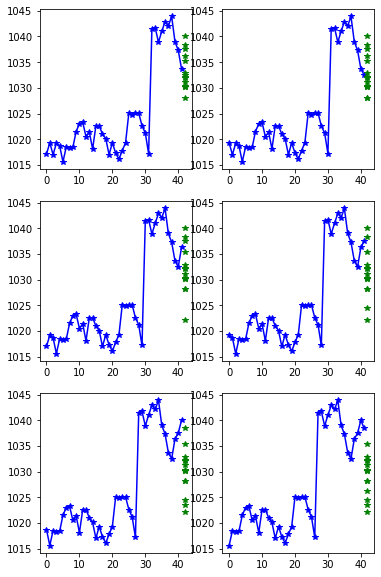

In [ ]:
dbunch = TSDataBunch.from_folder(path, horizon = 14, nrows=100)
dbunch.show_batch(max_n=6)

In [ ]:
model = DNN(input_channels=1,
            output_channels=1,
            horizon=14,
            lookback = 14*3
           )

print('Number of model parameters: {}.'.format(model.n_parameters))

Number of model parameters: 43264.


In [ ]:
# TODO make custom learner with custom model
learn = Learner(dbunch, model, loss_func = F.mse_loss, opt_func= Adam, metrics=accuracy)

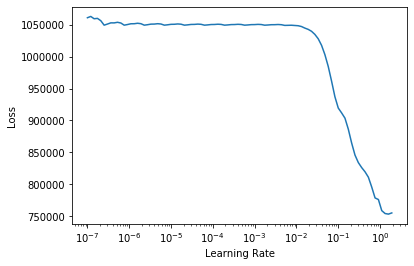

In [ ]:
from fastai2.callback.all import *
learn.lr_find()